In [100]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#imputers
from impyute.imputation.cs import mice

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 250)

In [114]:
SEED = 42

### Загрузка данных

In [67]:
churn_data = pd.read_csv('./Data/orange_small_churn_data.txt')
# churn_data.head()

In [68]:
churn_labels = np.loadtxt('./Data/orange_small_churn_labels.txt').astype('int')
churn_labels = np.reshape(churn_labels, (40000, 1))
churn_data['label'] = churn_labels > 0 #convert (-1, 1) to (True, False)

In [69]:
churn_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,600.0,NaN,20.0,480.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,82752.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.907926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,716008.0,NaN,0.0,NaN,NaN,14599.92,NaN,5.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,144.0,-1209960.0,NaN,NaN,NaN,NaN,NaN,1660.0,NaN,NaN,NaN,66.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.0,326915.0,604276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,389396.0,NaN,NaN,NaN,2313888.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,599532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,NaN,EkHG,9_Y1,k13i,09_Q,IYzP,GjJ35utlTa_GNSvxxpb9ju,kIsH,NaN,uKAI,L84s,JBfYVit4g8,NaN,NaN,NaN,TDctq2l,KmRo,cJvF,FzaX,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,False
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,NaN,NaN,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.0,265.0,NaN,2.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2706120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.870327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128,0.0,NaN,1661128.0,NaN,0.0,NaN,NaN,67529.09,NaN,25.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,72.0,417932.0,NaN,NaN,NaN,NaN,NaN,1025.0,NaN,NaN,NaN,66.0,NaN,24912.0,40.0,NaN,NaN,NaN,NaN,NaN,0.0,1934460.0,349568.0,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,NaN,735.0,NaN,NaN,NaN,6502680.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,364182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0,NaN,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,NaN,JDd6,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,I_mbgcr,NaN,XTbqizz,qMoY,cJvF,FzaX,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,False
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,NaN,NaN,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,220.0,NaN,0.0,72.0,NaN,NaN,311.76,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4698780.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.981628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0

Первые 190 признаков - числовые, остальные 40 - категориальные.

### Подготовка данных

#### Отбор признаков по колчеству пропущенных значений

Определим, есть ли в датафрейме полностью пустые столбцы. 

In [71]:
const_feature = churn_data.isna().sum(axis = 0) == len(churn_data)
useless_features = const_feature[const_feature == True].index
print('Полностью пустые признаки: \n', useless_features.to_list())

Полностью пустые признаки: 
 ['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185', 'Var209', 'Var230']


In [79]:
num_features_names = ['Var{}'.format(i) for i in range(1, 191) if 'Var{}'.format(i) not in useless_features]
cat_features_names = ['Var{}'.format(i) for i in range(191, 231) if 'Var{}'.format(i) not in useless_features]

print('Количество числовых признаков:', len(num_features_names))
print('Количество категориальных признаков:', len(cat_features_names))

Количество числовых признаков: 174
Количество категориальных признаков: 38


In [80]:
num_data = churn_data.loc[:, num_features_names]
cat_data = churn_data.loc[:, cat_features_names]

Подберем порог отбрасывания числовых признаков по количеству пустых объектов

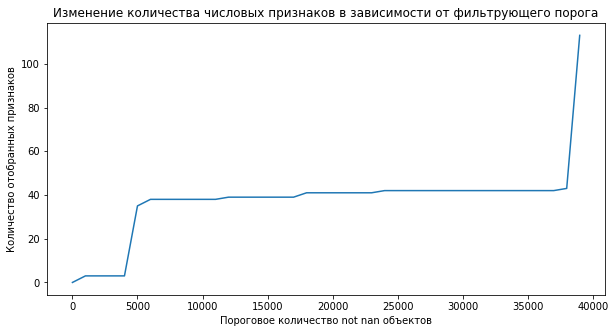

In [82]:
feature_amount = []
for threshold in range(0, 40000, 1000):
    nan_counter = num_data.isna().sum(axis = 0)
    f_amount = len(nan_counter[nan_counter < threshold])
    feature_amount.append(f_amount)

plt.figure(figsize = (10, 5))
plt.plot(range(0, 40000, 1000), feature_amount)
plt.title('Изменение количества числовых признаков в зависимости от фильтрующего порога')
plt.xlabel('Пороговое количество not nan объектов')
plt.ylabel('Количество отобранных признаков')
plt.show()

In [91]:
NUM_THRESHOLD = 25000

In [94]:
nan_count = num_data.isna().sum(axis = 0).to_frame(name = 'count')
useful_num_featues = nan_count[nan_count['count'] < NUM_THRESHOLD].index

num_data = num_data[useful_num_featues]

In [98]:
print('Итоговое количество отобранных числовых признаков:', num_data.shape[1])

Итоговое количество отобранных числовых признаков: 42


#### Разбиение данных

In [106]:
full_data = pd.concat([num_data, cat_data, churn_data['label']], axis = 1)
full_data.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,label
0,3052.0,NaN,NaN,480.0,600.0,20.0,480.0,200.00,0.0,82752.0,0.0,2.907926,NaN,NaN,34,NaN,716008.0,0.0,14599.92,5.0,32.0,NaN,144.0,144.0,-1209960.0,1660.0,66.0,NaN,4.0,0.0,326915.0,604276.0,NaN,0.0,9.0,389396.0,2313888.0,28.0,599532.0,0.0,0.0,NaN,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,NaN,EkHG,9_Y1,k13i,09_Q,IYzP,GjJ35utlTa_GNSvxxpb9ju,kIsH,uKAI,L84s,JBfYVit4g8,NaN,NaN,NaN,TDctq2l,KmRo,cJvF,FzaX,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,False
1,1813.0,7.0,636.0,212.0,265.0,2.0,128.0,166.56,0.0,2706120.0,0.0,5.870327,27.0,3.0,128,0.0,1661128.0,0.0,67529.09,25.0,10.0,32289.0,80.0,72.0,417932.0,1025.0,66.0,24912.0,40.0,0.0,1934460.0,349568.0,205.0,0.0,18.0,735.0,6502680.0,14.0,364182.0,0.0,0.0,276.0,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,NaN,JDd6,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,I_mbgcr,NaN,XTbqizz,qMoY,cJvF,FzaX,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,False
2,1953.0,7.0,448.0,176.0,220.0,0.0,72.0,311.76,0.0,4698780.0,0.0,5.981628,18.0,3.0,166,245.0,3025152.0,0.0,85266.00,35.0,0.0,53388.0,40.0,48.0,-124655.2,590.0,78.0,7218.0,36.0,0.0,3148410.0,1086210.0,400.0,0.0,27.0,0.0,10569040.0,18.0,0.0,0.0,0.0,NaN,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,NaN,dnwD,9_Y1,mTeA,VpdQ,hAFG,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,4kVnq_T26xq1p,NaN,NaN,NaN,pMWBUmQ,qLXr,UYBR,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,False
3,1533.0,7.0,4.0,332.0,415.0,0.0,144.0,220.08,5.0,864384.0,0.0,5.108097,9.0,NaN,30,0.0,2642240.0,0.0,74107.20,10.0,2.0,NaN,32.0,32.0,378473.6,1435.0,24.0,693.0,NaN,8.0,7066700.0,650390.0,5.0,0.0,0.0,0.0,9676200.0,108.0,253284.0,0.0,0.0,NaN,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,NaN,CwmB,F3hy,vzJD,VpdQ,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJtVhC,JC0e,cJvF,FzaX,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,True
4,686.0,7.0,0.0,160.0,200.0,2.0,48.0,278.00,0.0,4364880.0,0.0,0.650716,9.0,3.0,32,0.0,1440.0,0.0,171072.90,25.0,12.0,106455.0,32.0,8.0,142602.4,490.0,60.0,468.0,-28.0,0.0,3794460.0,642816.0,225.0,0.0,9.0,554414.0,10535200.0,24.0,2851284.0,0.0,0.0,NaN,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,NaN,625Z,9_Y1,m_h1,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,NGZXfGp,064o,cJvF,FzaX,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,False


In [110]:
num_col_names = num_data.columns
cat_col_names = cat_data.columns

print('Число сырых числовых признаков', len(num_col_names))
print('Число сырых категориальных признаков', len(cat_col_names))

Число сырых числовых признаков 42
Число сырых категориальных признаков 38


In [116]:
X = full_data.drop(columns = ['label'])
y = full_data['label']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = SEED)

##### Подбор  методов запонения пропусков в данных

Обзор стратегий заполнения: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Подходы для числовых данных:
* [MICE](https://impyute.readthedocs.io/en/latest/index.html)
* DataWig

Подходы для категориальных данных:
* kNN
* fillna + дополнительный признак

**MICE**

In [119]:
X_train_num_mice = mice(X_train_raw[num_col_names])

/home/grigoriy/.local/lib/python3.6/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


KeyboardInterrupt: 

In [ ]:
X_train_num_mice.head()